In [5]:
import numpy as np
import pandas as pd
import statistics as st
import ast
import math
import matplotlib.pyplot as plt
from scipy.stats import variation

In [6]:
# creating pandas dataframes from csv files with word/bigram frequency data
subtl_freq = pd.read_csv('/home/rubi/Desktop/Action_Control_Lab/python_scripts/string_pool/SUBTLEXusExcel2007.csv')
guten_freq = pd.read_csv('/home/rubi/Desktop/Action_Control_Lab/python_scripts/string_pool/bigram_freqs.csv')

In [7]:
### Goal is to determine the word frequency, bigrams, bigram frequencies, average bigram frequency, and median bigram frequency for each
### word in the SUBLTEX lexicon. And put them all into one dataframe. 

In [8]:
# creating sub-dataset with only data we need
wf = subtl_freq[['Word','SUBTLWF']] # wf == word frequency
bf = guten_freq[['Bigrams', 'Frequency']] # bf == bigram frequency

In [9]:
# filtering for only words with 5 letters
oldindex_fivewf = wf[(wf.Word.str.len()==5)]
# resetting index
fivewf = oldindex_fivewf.reset_index(drop=True)

In [10]:
# determining bigrams present in each word
bi_results = []
for x in fivewf['Word']:
    word = str(x).lower()
    bigrams_in_word = []
    for y in bf['Bigrams']:
        if y in word:
            bigrams_in_word.append(y)
    bi_results.append(bigrams_in_word)

In [11]:
# creating dataframe of bigrams in each word
biw = pd.DataFrame(bi_results, columns=['bi1', 'bi2', 'bi3', 'bi4']) # biw == bigrams in word

In [12]:
# determining frequency of bigrams present in each word
bf_results = []
for x in bi_results:
    bigram_freqs = []
    for y in bf['Bigrams']:
        if y in x:
            loc = bf.loc[bf['Bigrams']==y].index[0]
            bigram_freqs.append(bf.Frequency[loc])
    bf_results.append(bigram_freqs)

In [13]:
# creating dataframe of bigram freqs in each word
bf_byword = pd.DataFrame(bf_results, columns=['bf1', 'bf2', 'bf3', 'bf4'])

In [14]:
# find bigram frequency average for each word
avg_freq = []
for x in bf_results:
    avg_freq.append(st.mean(x))

In [15]:
# creating dataframe of average bigram freq for each word
bf_avg = pd.DataFrame(avg_freq, columns=['average bf'])

In [16]:
# find median bigram frequency for each word
med_freq = []
for x in bf_results:
    med_freq.append(st.median(x))

In [17]:
# creating dataframe of median bigram freq for each word
bf_med = pd.DataFrame(med_freq, columns=['median bf'])

In [18]:
# combining all info into one data frame
all_info = pd.concat([fivewf, biw, bf_byword, bf_avg, bf_med], axis=1)

In [19]:
# data sorted by average bigram frequency (highest to lowest)
sorted_all_oldindex = all_info.sort_values(by='average bf', ascending=False)
sorted_all = sorted_all_oldindex.reset_index(drop=True)
sorted_all

,Word,SUBTLWF,bi1,bi2,bi3,bi4,bf1,bf2,bf3,bf4,average bf,median bf
0,there,4348.12,er,he,re,th,12934901,21484684,10687711,22288309.0,16848901,17209792.5
1,ither,0.08,er,he,it,th,12934901,21484684,6637233,22288309.0,15836281,17209792.5
2,Uther,1.06,er,he,th,ut,12934901,21484684,22288309,3257233.0,14991281,17209792.5
3,other,735.39,er,he,ot,th,12934901,21484684,2906507,22288309.0,14903600,17209792.5
4,ether,2.12,er,et,he,th,12934901,2499226,21484684,22288309.0,14801780,17209792.5
...,...,...,...,...,...,...,...,...,...,...,...,...
6773,pukka,0.08,ka,kk,pu,uk,60568,1820,514720,33610.0,152679,47089.0
6774,Gypsy,6.63,gy,ps,sy,yp,52572,271689,160250,45202.0,132428,106411.0
6775,Kudzu,0.10,dz,ku,ud,zu,388,8936,458716,5050.0,118272,6993.0
6776,jazzy,0.49,az,ja,zy,zz,90138,40073,10486,27727.0,42106,33900.0


In [20]:
### Filtering to select words to go in each word/bigram category

### NOTE: useful for displaying entire dataframe
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can also be specified
#     print(medbf_sorted)

In [21]:
# sample words with highest average bigram freq
hibf_words = sorted_all[sorted_all['average bf'] > 10000000]

In [22]:
# sort by word frequency
hibf_sorted_oldindex = hibf_words.sort_values(by='SUBTLWF', ascending=False)
hibf_sorted = hibf_sorted_oldindex.reset_index(drop=True)
hibf_sorted

## Selected words
# Most familiar : there, think -- highest values for both word freq and average bf
# Semi familiar : cheer, theme -- closest word freq to mean with high average bf
# Un familiar : tithe, therm -- highest average bf values with lowest word freq values

,Word,SUBTLWF,bi1,bi2,bi3,bi4,bf1,bf2,bf3,bf4,average bf,median bf
0,there,4348.12,er,he,re,th,12934901,21484684,10687711,22288309.0,16848901,17209792.5
1,think,2691.39,hi,in,nk,th,6198006,13597302,445067,22288309.0,10632171,9897654.0
2,Where,1830.22,er,he,re,wh,12934901,21484684,10687711,2825082.0,11983094,11811306.0
3,Thank,1115.24,an,ha,nk,th,12315713,6967591,445067,22288309.0,10504170,9641652.0
4,thing,1088.67,hi,in,ng,th,6198006,13597302,6239065,22288309.0,12080670,9918183.5
5,these,904.00,es,he,se,th,6783768,21484684,5334516,22288309.0,13972819,14134226.0
6,other,735.39,er,he,ot,th,12934901,21484684,2906507,22288309.0,14903600,17209792.5
7,their,655.16,ei,he,ir,th,1243103,21484684,2142678,22288309.0,11789693,11813681.0
8,cheer,18.69,ch,ee,er,he,3267507,2839722,12934901,21484684.0,10131703,8101204.0
9,theme,13.92,em,he,me,th,2039661,21484684,4724108,22288309.0,12634190,13104396.0


In [23]:
# sample of words with medium average bigram freq, based on mean average bigram freq
medbf_words = sorted_all[sorted_all['average bf'].between(3200000, 3500000)]

In [24]:
medbf_sorted_oldindex = medbf_words.sort_values(by='SUBTLWF', ascending=False)
medbf_sorted = medbf_sorted_oldindex.reset_index(drop=True)
medbf_sorted

# Words I selected
# Most familiar: about, would -- closest average bf to mean with the highest word freq value
# Semi familar: belly, champ -- closest average bf to mean with closest word freq to mean
# Un familiar: haole, cooed -- closest average bf to mean with the lowest word freq value

,Word,SUBTLWF,bi1,bi2,bi3,bi4,bf1,bf2,bf3,bf4,average bf,median bf
0,about,3631.49,ab,bo,ou,ut,1203849,1140702,7425307,3257233.0,3256772,2230541.0
1,would,1767.88,ld,ou,ul,wo,2012500,7425307,2181271,1723496.0,3335643,2096885.5
2,years,568.69,ar,ea,rs,ye,6203507,4607205,2323238,672945.0,3451723,3465221.5
3,whole,385.49,ho,le,ol,wh,3374563,5038239,1804856,2825082.0,3260685,3099822.5
4,taken,138.65,ak,en,ke,ta,822388,8326622,1701308,2537258.0,3346894,2119283.0
...,...,...,...,...,...,...,...,...,...,...,...,...
373,Penni,0.02,en,ni,nn,pe,8326622,1674922,493180,2409684.0,3226102,2042303.0
374,stept,0.02,ep,pt,st,te,966201,509969,5812318,6569019.0,3464376,3389259.5
375,balas,0.02,al,as,ba,la,4622155,5709926,726910,2805282.0,3466068,3713718.5
376,horah,0.02,ah,ho,or,ra,86431,3374563,7218531,3193102.0,3468156,3283832.5


In [26]:
# sample of words with low average bigram freq
lowbf_words = sorted_all[sorted_all['average bf'] < 800000]
lowbf_words

,Word,SUBTLWF,bi1,bi2,bi3,bi4,bf1,bf2,bf3,bf4,average bf,median bf
6494,faqir,0.02,aq,fa,ir,qi,4924,1043958,2142678,36.0,797899,524441.0
6495,figgy,0.16,fi,gg,gy,ig,1367025,161875,52572,1609791.0,797815,764450.0
6496,Gabby,1.71,ab,bb,by,ga,1203849,87918,999355,890709.0,795457,945032.0
6497,gambs,0.02,am,bs,ga,mb,1610395,205620,890709,474640.0,795341,682674.5
6498,golfs,0.04,fs,go,lf,ol,28293,856077,489413,1804856.0,794659,672745.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6773,pukka,0.08,ka,kk,pu,uk,60568,1820,514720,33610.0,152679,47089.0
6774,Gypsy,6.63,gy,ps,sy,yp,52572,271689,160250,45202.0,132428,106411.0
6775,Kudzu,0.10,dz,ku,ud,zu,388,8936,458716,5050.0,118272,6993.0
6776,jazzy,0.49,az,ja,zy,zz,90138,40073,10486,27727.0,42106,33900.0


In [89]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can also be specified
    print(lowbf_words)

       Word  SUBTLWF bi1 bi2 bi3   bi4      bf1      bf2      bf3        bf4  \
6494  faqir     0.02  aq  fa  ir    qi     4924  1043958  2142678       36.0   
6495  figgy     0.16  fi  gg  gy    ig  1367025   161875    52572  1609791.0   
6496  Gabby     1.71  ab  bb  by    ga  1203849    87918   999355   890709.0   
6497  gambs     0.02  am  bs  ga    mb  1610395   205620   890709   474640.0   
6498  golfs     0.04  fs  go  lf    ol    28293   856077   489413  1804856.0   
6499  Peggy    17.00  eg  gg  gy    pe   540490   161875    52572  2409684.0   
6500  loafs     0.04  af  fs  lo    oa   469087    28293  2267154   390733.0   
6501  exams     2.84  am  ex  ms    xa  1610395   894734   553471    93021.0   
6502  pigmy     0.08  gm  ig  my    pi    32861  1609791   727163   763496.0   
6503  gulfs     0.02  fs  gu  lf    ul    28293   430380   489413  2181271.0   
6504  bumps     3.47  bu  mp  ps    um  1183063  1042198   271689   630614.0   
6505  cyclo     0.10  cl  cy  lo    yc  

In [34]:
lowbf_sorted_oldindex = lowbf_words.sort_values(by='SUBTLWF', ascending=False)
lowbf_sorted = lowbf_sorted_oldindex.reset_index(drop=True)
lowbf_sorted

# Words I selected
# Most familiar: lucky, buddy -- lowest average bf with word freqs in the triple digits
# Semi familar: puppy, vodka -- closest word freq to mean with low average bf
# Un familiar: faqir, druze -- lowest word freq with low average bf

,Word,SUBTLWF,bi1,bi2,bi3,bi4,bf1,bf2,bf3,bf4,average bf,median bf
0,lucky,143.45,ck,ky,lu,uc,925655,49764,568081,891233.0,608683,729657.0
1,buddy,102.88,bu,dd,dy,ud,1183063,306083,360103,458716.0,576991,409409.5
2,judge,79.67,dg,ge,ju,ud,179532,1931850,263672,458716.0,708442,361194.0
3,Bobby,69.55,bb,bo,by,ob,87918,1140702,999355,449522.0,669374,724438.5
4,drugs,48.31,dr,gs,ru,ug,567936,349745,705492,1018481.0,660413,636714.0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,ruffs,0.02,ff,fs,ru,uf,760967,28293,705492,122981.0,404433,414236.5
280,gauzy,0.02,au,ga,uz,zy,684842,890709,19836,10486.0,401468,352339.0
281,pulps,0.02,lp,ps,pu,ul,109882,271689,514720,2181271.0,769390,393204.5
282,Duddy,0.02,dd,du,dy,ud,306083,449830,360103,458716.0,393683,404966.5


In [40]:
lowbf_sorted[lowbf_sorted['Word'] == 'Druze']

,Word,SUBTLWF,bi1,bi2,bi3,bi4,bf1,bf2,bf3,bf4,average bf,median bf
255,Druze,0.02,dr,ru,uz,ze,567936,705492,19836,210896.0,376040,389416.0


In [26]:
### Determining frequency variables of pseudo words to create strings for each familiarity category

In [218]:
# defining pseudo words
pseudo_array = ['edthe', 'heond', 'kremp', 'isvar', 'zibja', 'pykka'] 
# creating dataframe of bigram freqs in each word
pw = pd.DataFrame(pseudo_array, columns=['String']) # pw == pseudo words

# Words I selected
# High bigram freq:  -- edthe, heond -- above cutoff used for high avg bf in previous cell
# Medium bigram freq: kremp, isvar  -- closest to average bf mean
# Low bigram freq: zibja, pykka -- significantly below cutoff used for low avg bf in previous cell

In [219]:
# determining all string variables

# determining bigrams present in each word
bi_results = []
for x in pseudo_array:
    word = str(x).lower()
    bigrams_in_word = []
    for y in bf['Bigrams']:
        if y in word:
            bigrams_in_word.append(y)
    bi_results.append(bigrams_in_word)
    
# creating dataframe of bigrams in each word
biw = pd.DataFrame(bi_results, columns=['bi1', 'bi2', 'bi3', 'bi4']) # biw == bigrams in word

# determining frequency of bigrams present in each word
bf_results = []
for x in bi_results:
    bigram_freqs = []
    for y in bf['Bigrams']:
        if y in x:
            loc = bf.loc[bf['Bigrams']==y].index[0]
            bigram_freqs.append(bf.Frequency[loc])
    bf_results.append(bigram_freqs)
    
# creating dataframe of bigram freqs in each word
bf_byword = pd.DataFrame(bf_results, columns=['bf1', 'bf2', 'bf3', 'bf4'])

# find bigram frequency average for each word
avg_freq = []
for x in bf_results:
    avg_freq.append(st.mean(x))
    
# creating dataframe of average bigram freq for each word
bf_avg = pd.DataFrame(avg_freq, columns=['average bf'])

In [220]:
# combining all info into one data frame
all_info = pd.concat([pw, biw, bf_byword, bf_avg], axis=1)

,String,bi1,bi2,bi3,bi4,bf1,bf2,bf3,bf4,average bf
0,edthe,dt,ed,he,th,11191,7805967,21484684,22288309,12897537
1,heond,eo,he,nd,on,305120,21484684,9414961,8830487,10008813
2,kremp,em,kr,mp,re,2039661,5683,1042198,10687711,3443813
3,isvar,ar,is,sv,va,6203507,6729622,4077,560130,3374334
4,zibja,bj,ib,ja,zi,105433,493267,40073,54565,173334
5,pykka,ka,kk,py,yk,60568,1820,149099,4767,54063


In [ ]:
### Plots and lexicon data that was useful for selecting words

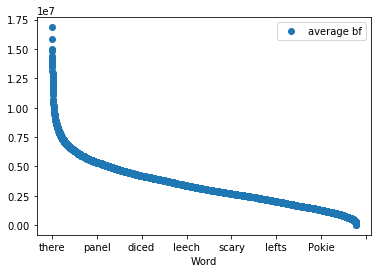

In [16]:
# plot of all words by average bigram freq
sorted_all.plot(x='Word', y='average bf', style='o')

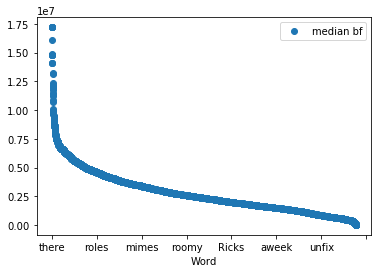

In [97]:
# plot of all words by median bigram freq
sorted_all.plot(x='Word', y='median bf', style='o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74d06088e0>]],
      dtype=object)

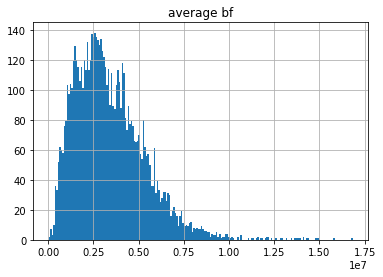

In [104]:
sorted_all.hist(column='average bf', bins=200)

In [108]:
print(st.median(sorted_all['average bf']))
print(st.mean(sorted_all['average bf']))

3070789.0
3398019.6708468576


In [221]:
# bigrams sorted by freq (highest to lowest)
sorted_bf = bf.sort_values(by='Frequency', ascending=False)
sorted_bf

,Bigrams,Frequency
501,th,22288309
186,he,21484684
221,in,13597302
121,er,12934901
13,an,12315713
...,...,...
422,qg,1
431,qp,0
426,qk,0
425,qj,0


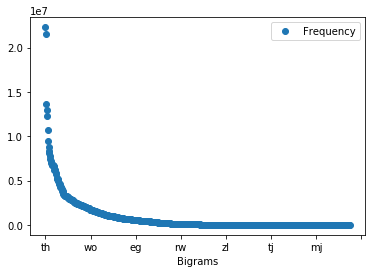

In [18]:
# Bigrams plotted by frequency
sorted_bf.plot(x='Bigrams', y='Frequency', style='o')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74d091cc10>]],
      dtype=object)

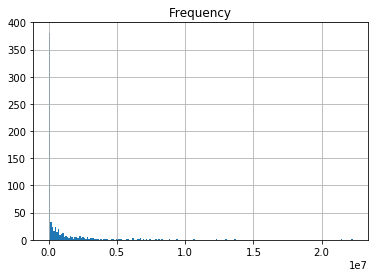

In [28]:
# histogram of bigrams sorted by frequency
sorted_bf.hist(column='Frequency', bins=200)

In [43]:
print(st.median(all_info['SUBTLWF']))
print(st.mean(all_info['SUBTLWF']))

0.47
15.142115668338743


In [22]:
# median and mean of bigram frequency data frame
print(st.median(bf['Frequency']))
print(st.mean(bf['Frequency']))

51669.0
864722.4511834319


In [79]:
# useful for filtering ## wf.set_index('Word').filter(like=x, axis=0)